<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Heart Disease
Heart disease is one of the main causes of death worldwide, so this is a good start to use data science for good.

To learn how to prevent heart disease is necessary to know how to reliably detect it first.

There is a dataset from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

Data is courtesy of **Yeh, I-Cheng** via the **UCI Machine Learning** repository:
- Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008, doi:10.1016/j.eswa.2008.07.018.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data

## Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the [**Blood Transfusion Service Center Data Set**](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) in Hsin-Chu City in Taiwan.
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.
        e-mail:icyeh 'at' chu.edu.tw
        Tel: 886-3-5186511
        Date Donated: October 3, 2008 

- Citation Request:
- **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM 
    model using Bernoulli sequence, "Expert Systems with Applications, 2008 
    (doi:10.1016/j.eswa.2008.07.018).

In [ ]:
# Find the dataset described above 
# Hint: search for it through the UCI Machine Learning Repository

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.metrics import recall_score
from sklearn import metrics

In [2]:
# Read data in pandas
source = '../DATA/transfusion.data'
df = pd.read_csv(source)
# Check data has loaded correctly
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [ ]:
# Perform EDA by investigating each of the points above 

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [ ]:
# Filter/subset/clean the data according to your EDA findings

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [3]:
# Split your data
feat = df.columns[:-1]
X = df[feat]
y = df['whether he/she donated blood in March 2007']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [9]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(max_depth=2, random_state=0)

In [10]:
#X, y = make_classification(n_samples=1000, n_features=4,
#                           n_informative=2, n_redundant=0,
#                           random_state=0, shuffle=False)
#print(clf.predict([[0, 0, 0, 0]]))

# Step 9: Fit the Model

In [11]:
# Fit model
clf1.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [12]:
# Evaluate model against training set
clf1.score(X_test, y_test)

0.7422222222222222

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [40]:
# Evaluate model against test set
clf2 = RandomForestClassifier(max_depth=2, random_state=0)

In [41]:
from pprint import pprint
clf2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [42]:
# Look at parameters used by our current forest
clf2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [43]:
params = {
    'n_estimators' : [100,110,120,130,140,150],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(3,5),
    'class_weight':['balanced','balanced_subsample',None]   
}

In [44]:
# Grid Search Cross Validation
# Grid Search = Process of hyperparameter tuning, to determine optimal values
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(clf2, param_grid=params)

In [45]:
grid.fit(X,y)

GridSearchCV(estimator=RandomForestClassifier(max_depth=2, random_state=0),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 5),
                         'n_estimators': [100, 110, 120, 130, 140, 150]})

In [46]:
grid.best_estimator_     # Grid with best estimator

RandomForestClassifier(max_depth=3, random_state=0)

# Step 12: Feature Importance

In [47]:
grid.best_estimator_.feature_importances_

array([0.46628786, 0.17290279, 0.18119477, 0.17961459])

<BarContainer object of 4 artists>

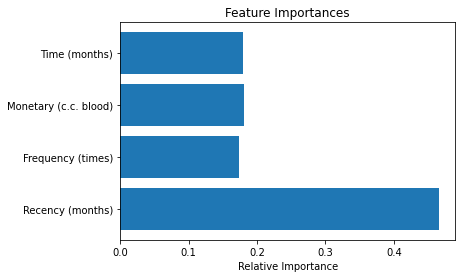

In [57]:
# plt.figure(1)
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.barh(X.columns, grid.best_estimator_.feature_importances_)

In [58]:
X.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)'],
      dtype='object')

In [59]:
for name, score in zip(X.columns, grid.best_estimator_.feature_importances_):
    print(f'Score of {name}: {score}')

Score of Recency (months): 0.4662878580114072
Score of Frequency (times): 0.17290278805092096
Score of Monetary (c.c. blood): 0.18119476875629537
Score of Time (months): 0.17961458518137646


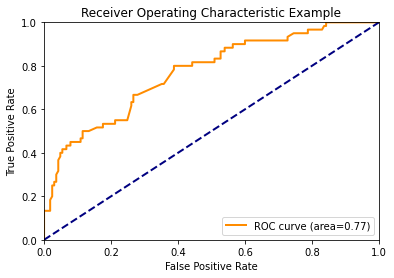

In [55]:
preds = grid.best_estimator_.predict_proba(X_test)[:,1]
fpr,tpr,_=metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)

plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area=%0.2f)' %roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc='lower right')
plt.show()

In [60]:
y_pred = grid.best_estimator_.predict(X_test)

In [61]:
y_test

580    0
356    0
133    0
250    0
299    0
      ..
182    0
567    0
264    0
434    0
223    0
Name: whether he/she donated blood in March 2007, Length: 225, dtype: int64

In [62]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [66]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('F1 score:', f1_score(y_test, y_pred))
print ('Recall:', recall_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test, y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))


Accuracy: 0.7555555555555555
F1 score: 0.22535211267605634
Recall: 0.13333333333333333
Precision: 0.7272727272727273

 clasification report:
               precision    recall  f1-score   support

           0       0.76      0.98      0.85       165
           1       0.73      0.13      0.23        60

    accuracy                           0.76       225
   macro avg       0.74      0.56      0.54       225
weighted avg       0.75      0.76      0.69       225


 confussion matrix:
 [[162   3]
 [ 52   8]]


In [63]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred))
print('Recall:',metrics.recall_score(y_test,y_pred))

Accuracy: 0.7555555555555555
Precision: 0.7272727272727273
Recall: 0.13333333333333333


In [64]:
cf_matrix = metrics.confusion_matrix(y_test, y_pred)

<AxesSubplot:>

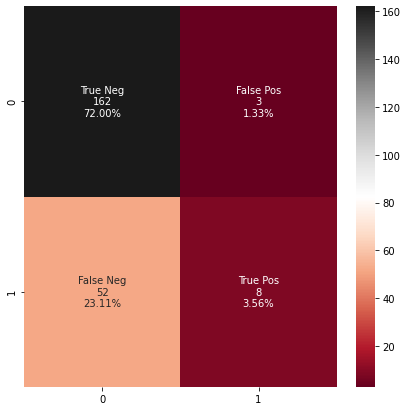

In [65]:
plt.figure(figsize=(7,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

# Step 13: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions